# Task: Riconoscimento automatico di una review positiva o negativa;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

## Get reviews dataset

In [2]:
df_review = pd.read_csv('./dataset/review_dropped.csv')

In [3]:
# review_id // string, 22 character unique review id
# user_id // string, 22 character unique user id, maps to the user in user.json
# business_id // string, 22 character business id, maps to business in business.json
# stars // integer, star rating
# date // string, date formatted YYYY-MM-DD
# text // string, the review itself
# useful // integer, number of useful votes received by review
# funny // integer, number of funny votes received by review
# cool // integer, number of cool votes received by review

In [4]:
# Drop some rows in order to increment performances

# df_review = df_review.iloc[460000:, :]
df_review = df_review.iloc[499000:, :]
df_review = df_review.reset_index()

df_review.head(5)

,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,499000,499000,6989282,NIukhO8BR2wACBztNSRDbQ,Ta9o6-WIRDn5KDvZy8XPNA,jMStvE-tQzSpRCAO0nAE6g,1.0,0.0,0.0,0.0,"Do not eat there! Horrible management, staff a...",2019-05-16 03:34:49
1,499001,499001,6989283,H_-EZhZAZqginAR8EkKxIw,k0qcNly5aTjjr__iNdPKBw,beSgKHecMsEyz6iy7gm-9w,5.0,0.0,0.0,0.0,What a great find! Celebrated out anniversary ...,2021-05-17 01:19:06
2,499002,499002,6989284,aeNMLPf1XGedxQLyTwS8Bg,_0EhXpz__Bs5qNckMW8IEw,Meww6RIE4cFL_kG0aRlbAA,5.0,2.0,0.0,1.0,Great happy hour & great food. I had a great t...,2021-05-09 11:23:03
3,499003,499003,6989285,oDrDjpgNDUXAmrYWU6Q1bQ,tfxcBBdKo28s6OAYNJDM6A,mY4i1N0Hm2fjIgU0Eyn11Q,1.0,2.0,0.0,0.0,"I've been dining here for years, but a recent ...",2021-05-17 22:45:45
4,499004,499004,6989286,jbSsvlNW1VGc-o8b3WBjDw,q6CU8yNwSs2ErfhX3DqaNQ,GxlUXBXe-yw6B5Fqf8kgig,3.0,2.0,1.0,1.0,Food was pretty good. Had the southern fried c...,2016-09-19 23:52:02


### Add boolean positive_review to dataset in order to recognize positive review (>= 4 stars)


In [5]:
df_review['review_rating'] = np.where(df_review['stars'] >= 4, 1, 0)

df_review.head(5)


,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_rating
0,499000,499000,6989282,NIukhO8BR2wACBztNSRDbQ,Ta9o6-WIRDn5KDvZy8XPNA,jMStvE-tQzSpRCAO0nAE6g,1.0,0.0,0.0,0.0,"Do not eat there! Horrible management, staff a...",2019-05-16 03:34:49,0
1,499001,499001,6989283,H_-EZhZAZqginAR8EkKxIw,k0qcNly5aTjjr__iNdPKBw,beSgKHecMsEyz6iy7gm-9w,5.0,0.0,0.0,0.0,What a great find! Celebrated out anniversary ...,2021-05-17 01:19:06,1
2,499002,499002,6989284,aeNMLPf1XGedxQLyTwS8Bg,_0EhXpz__Bs5qNckMW8IEw,Meww6RIE4cFL_kG0aRlbAA,5.0,2.0,0.0,1.0,Great happy hour & great food. I had a great t...,2021-05-09 11:23:03,1
3,499003,499003,6989285,oDrDjpgNDUXAmrYWU6Q1bQ,tfxcBBdKo28s6OAYNJDM6A,mY4i1N0Hm2fjIgU0Eyn11Q,1.0,2.0,0.0,0.0,"I've been dining here for years, but a recent ...",2021-05-17 22:45:45,0
4,499004,499004,6989286,jbSsvlNW1VGc-o8b3WBjDw,q6CU8yNwSs2ErfhX3DqaNQ,GxlUXBXe-yw6B5Fqf8kgig,3.0,2.0,1.0,1.0,Food was pretty good. Had the southern fried c...,2016-09-19 23:52:02,0


### Plot reviews

Positive reviews: 653
Negative reviews: 347


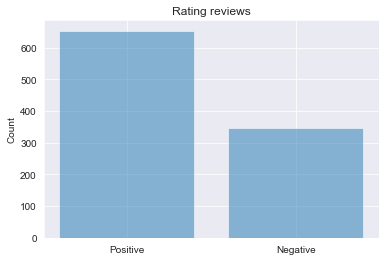

In [6]:
positive_count = (df_review['review_rating'] == 1).sum()
negative_count = (df_review['review_rating'] == 0).sum()

print("Positive reviews:", positive_count)

print("Negative reviews:", negative_count)

objects = ('Positive', 'Negative')
performance = [positive_count, negative_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Rating reviews')

plt.show()



# Text preprocessing


#### Create working df

In [7]:
df_review_text_rating = df_review[['text', 'review_rating']].copy()

In [8]:
import nltk

## Normalization

### Expand English contractions

In [9]:
import contractions

In [10]:
def expand(row):
    expanded_words = []
    for word in row['text'].split():
        expanded_words.append(contractions.fix(word))
    return ' '.join(expanded_words)


df_review_text_rating['expanded_text'] = df_review_text_rating.apply(expand, axis=1)

In [11]:
df_review_text_rating.head(5)

,text,review_rating,expanded_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a..."
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen..."
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...


## Tokenize

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
def tokenize(row):
    return word_tokenize(row['expanded_text'])


df_review_text_rating['tokenized_text'] = df_review_text_rating.apply(tokenize, axis=1)

In [14]:
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,..."
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann..."
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had..."
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b..."
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther..."


## Remove puncts

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def remove_punct(row):
    return [word for word in row['tokenized_text'] if word.isalpha()]


df_review_text_rating['no_punct_text'] = df_review_text_rating.apply(remove_punct, axis=1)

In [17]:
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text,no_punct_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,...","[Do, not, eat, there, Horrible, management, st..."
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann...","[What, a, great, find, Celebrated, out, annive..."
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had...","[Great, happy, hour, great, food, I, had, a, g..."
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b...","[I, have, been, dining, here, for, years, but,..."
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther...","[Food, was, pretty, good, Had, the, southern, ..."


## Stemming

In [18]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [19]:
def stemming(row):
    return [ps.stem(word) for word in row['no_punct_text']]


df_review_text_rating['stemmed_text'] = df_review_text_rating.apply(stemming, axis=1)

In [20]:
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text,no_punct_text,stemmed_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,...","[Do, not, eat, there, Horrible, management, st...","[do, not, eat, there, horribl, manag, staff, a..."
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann...","[What, a, great, find, Celebrated, out, annive...","[what, a, great, find, celebr, out, anniversar..."
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had...","[Great, happy, hour, great, food, I, had, a, g...","[great, happi, hour, great, food, i, had, a, g..."
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b...","[I, have, been, dining, here, for, years, but,...","[i, have, been, dine, here, for, year, but, a,..."
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther...","[Food, was, pretty, good, Had, the, southern, ...","[food, wa, pretti, good, had, the, southern, f..."


## Lemmatization

In [21]:
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
def lemmatization(row):
    return [lemmatizer.lemmatize(word) for word in row['stemmed_text']]


df_review_text_rating['lemmatized_text'] = df_review_text_rating.apply(lemmatization, axis=1)

In [23]:
df_review_text_rating.head(5)

,text,review_rating,expanded_text,tokenized_text,no_punct_text,stemmed_text,lemmatized_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,...","[Do, not, eat, there, Horrible, management, st...","[do, not, eat, there, horribl, manag, staff, a...","[do, not, eat, there, horribl, manag, staff, a..."
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann...","[What, a, great, find, Celebrated, out, annive...","[what, a, great, find, celebr, out, anniversar...","[what, a, great, find, celebr, out, anniversar..."
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had...","[Great, happy, hour, great, food, I, had, a, g...","[great, happi, hour, great, food, i, had, a, g...","[great, happi, hour, great, food, i, had, a, g..."
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b...","[I, have, been, dining, here, for, years, but,...","[i, have, been, dine, here, for, year, but, a,...","[i, have, been, dine, here, for, year, but, a,..."
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther...","[Food, was, pretty, good, Had, the, southern, ...","[food, wa, pretti, good, had, the, southern, f...","[food, wa, pretti, good, had, the, southern, f..."


## Remove stopwords

In [24]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')

In [25]:
# df_review_text_no_stopwords = df_review_text_lemmatized
#
# def remove_stopwords(row):
#   return [word for word in row['lemmatized_text'] if not word in stopwords.words()]
#
# df_review_text_no_stopwords['no_stopwords'] = df_review_text_no_stopwords.apply(remove_stopwords, axis=1)

In [26]:
# df_review_text_no_stopwords.head(5)

## Rejoin words after processing

In [27]:
def join_words(row):
    return " ".join(row['lemmatized_text'])


df_review_text_rating['processed_text'] = df_review_text_rating.apply(join_words, axis=1)

df_review_text_rating

,text,review_rating,expanded_text,tokenized_text,no_punct_text,stemmed_text,lemmatized_text,processed_text
0,"Do not eat there! Horrible management, staff a...",0,"Do not eat there! Horrible management, staff a...","[Do, not, eat, there, !, Horrible, management,...","[Do, not, eat, there, Horrible, management, st...","[do, not, eat, there, horribl, manag, staff, a...","[do, not, eat, there, horribl, manag, staff, a...",do not eat there horribl manag staff and food ...
1,What a great find! Celebrated out anniversary ...,1,What a great find! Celebrated out anniversary ...,"[What, a, great, find, !, Celebrated, out, ann...","[What, a, great, find, Celebrated, out, annive...","[what, a, great, find, celebr, out, anniversar...","[what, a, great, find, celebr, out, anniversar...",what a great find celebr out anniversari and t...
2,Great happy hour & great food. I had a great t...,1,Great happy hour & great food. I had a great t...,"[Great, happy, hour, &, great, food, ., I, had...","[Great, happy, hour, great, food, I, had, a, g...","[great, happi, hour, great, food, i, had, a, g...","[great, happi, hour, great, food, i, had, a, g...",great happi hour great food i had a great time...
3,"I've been dining here for years, but a recent ...",0,"I have been dining here for years, but a recen...","[I, have, been, dining, here, for, years, ,, b...","[I, have, been, dining, here, for, years, but,...","[i, have, been, dine, here, for, year, but, a,...","[i, have, been, dine, here, for, year, but, a,...",i have been dine here for year but a recent ho...
4,Food was pretty good. Had the southern fried c...,0,Food was pretty good. Had the southern fried c...,"[Food, was, pretty, good, ., Had, the, souther...","[Food, was, pretty, good, Had, the, southern, ...","[food, wa, pretti, good, had, the, southern, f...","[food, wa, pretti, good, had, the, southern, f...",food wa pretti good had the southern fri chick...
...,...,...,...,...,...,...,...,...
995,Latest addition to services from ICCU is Apple...,1,Latest addition to services from ICCU is Apple...,"[Latest, addition, to, services, from, ICCU, i...","[Latest, addition, to, services, from, ICCU, i...","[latest, addit, to, servic, from, iccu, is, ap...","[latest, addit, to, servic, from, iccu, is, ap...",latest addit to servic from iccu is appl pay f...
996,"This spot offers a great, affordable east week...",1,"This spot offers a great, affordable east week...","[This, spot, offers, a, great, ,, affordable, ...","[This, spot, offers, a, great, affordable, eas...","[thi, spot, offer, a, great, afford, east, wee...","[thi, spot, offer, a, great, afford, east, wee...",thi spot offer a great afford east weekend pad...
997,This Home Depot won me over when I needed to g...,1,This Home Depot won me over when I needed to g...,"[This, Home, Depot, won, me, over, when, I, ne...","[This, Home, Depot, won, me, over, when, I, ne...","[thi, home, depot, won, me, over, when, i, nee...","[thi, home, depot, won, me, over, when, i, nee...",thi home depot won me over when i need to get ...
998,For when I'm feeling like ignoring my calorie-...,1,For when I am feeling like ignoring my calorie...,"[For, when, I, am, feeling, like, ignoring, my...","[For, when, I, am, feeling, like, ignoring, my...","[for, when, i, am, feel, like, ignor, my, and,...","[for, when, i, am, feel, like, ignor, my, and,...",for when i am feel like ignor my and indulg in...


## Split dataframe in training_set and test_set

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
X = df_review_text_rating["processed_text"]
y = df_review_text_rating["review_rating"]

# Training set = 80%
# Test set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [30]:
# Initialize
vectorizer = TfidfVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

X_train_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_train_vectorizer.toarray())
X_test_df = pd.DataFrame(columns=vectorizer.get_feature_names_out(), data=X_test_vectorizer.toarray())

In [31]:
X_train_df.head(5)

,abe,abid,abil,abita,abl,about,abov,abrupt,abruptli,absolut,...,zero,zest,zip,ziplock,zlt,zoal,zucchini,zumba,zushipok,ànd
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.072876,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_test_df.head(5)

,abe,abid,abil,abita,abl,about,abov,abrupt,abruptli,absolut,...,zero,zest,zip,ziplock,zlt,zoal,zucchini,zumba,zushipok,ànd
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.064824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms

In [122]:
# Features as Array
# features = np.array(vectorizer.get_feature_names_out())

array_X_train = X_train_vectorizer.toarray()
array_X_test = X_test_vectorizer.toarray()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Get best parameters

In [ ]:
def get_best_parameters(algorithm, algorithm_parameters, X_train_param):
    gs_algorithm = GridSearchCV(algorithm, algorithm_parameters, verbose=3, scoring='f1', n_jobs=-1)

    gs_algorithm.fit(X_train_param, y_train)

    print(gs_algorithm.best_params_)

    # Find best model score
    gs_algorithm.score(X_train_param, y_train)

### Execute algorithm

In [ ]:
def fit_and_predict(algorithm, X_train_param, X_test_param):

    # Training model
    algorithm.fit(X_train_param, y_train)

    # Predicting the test set results
    y_pred = algorithm.predict(X_test_param)

    # Training score
    print(f"Score on training set: {algorithm.score(X_train_param, y_train)}")
    print(f"Score on test set: {algorithm.score(X_train_param, y_test)}")

    test_set_score = algorithm.score(X_test_param, y_test) * 100

    return y_pred, test_set_score

### Confusion Matrix

In [ ]:
def confusion_matrix_plot(algorithm_name, y_pred_algorithm):
    confunsion_matrix_algorithm = confusion_matrix(y_test, y_pred_algorithm)
    df_confusion_matrix = pd.DataFrame(confunsion_matrix_algorithm, columns=['Predicted 0', 'Predicted 1'],
                                           index=['True 0', 'True 1'])
    # display(df_confusion_matrix_gnb)

    sns.heatmap(df_confusion_matrix, annot=True, fmt='d')
    plt.title(algorithm_name, "confusion matrix")
    plt.figure(figsize=(24, 14), dpi=100)
    plt.close()

### Performance metrics

In [ ]:
def classification_report_plot(algorithm_name, y_pred_algorithm):
    classification_report_algorithm = classification_report(y_test, y_pred_algorithm, output_dict=True)
    df_algorithm_report = pd.DataFrame(classification_report_algorithm).transpose()

    df_algorithm_report.iloc[:3, :3].plot(kind='bar', title= algorithm_name + 'classification report', rot=0)

    print(df_algorithm_report)

## AdaBoostClassifier

### Get best parameters

In [35]:
# parameters = {'n_estimators': [10, 50, 100, 250, 500],
#               'learning_rate': [0.01, 0.1],
#               'algorithm': ['SAMME', 'SAMME.R']}
#
# gs_ada = GridSearchCV(AdaBoostClassifier(), parameters, verbose=3, scoring='f1', n_jobs=-1)
#
# gs_ada.fit(X_train_vectorizer, y_train)
#
# print(gs_ada.best_params_)
#
# # Find best model score
# gs_ada.score(X_train_vectorizer, y_train)






Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 250}


0.9663551401869159

### Execute algorithm

In [121]:
ada = AdaBoostClassifier(n_estimators=250, learning_rate=0.1, algorithm='SAMME.R')

# Training model
ada.fit(X_train_vectorizer, y_train)

# Predicting the test set results
y_pred_ada = ada.predict(X_test_vectorizer)

# Training score
print(f"Score on training set: {ada.score(X_train_vectorizer, y_train)}")
print(f"Score on test set: {ada.score(X_test_vectorizer, y_test)}")

test_set_score_ada = ada.score(X_test_vectorizer, y_test) * 100

Score on training set: 0.955
Score on test set: 0.85


### Confusion Matrix

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from IPython.core.display_functions import display
import seaborn as sns

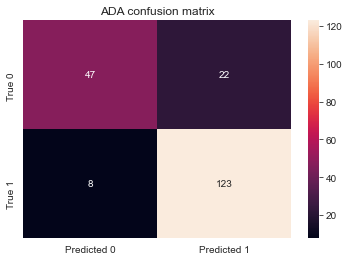

In [38]:
confunsion_matrix_ada = confusion_matrix(y_test, y_pred_ada)
df_confusion_matrix_ada = pd.DataFrame(confunsion_matrix_ada, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_ada)

sns.heatmap(df_confusion_matrix_ada, annot=True, fmt='d')
plt.title("ADA confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,0.854545,0.681159,0.758065,69.00
1,0.848276,0.938931,0.891304,131.00
accuracy,0.850000,0.850000,0.850000,0.85
macro avg,0.851411,0.810045,0.824684,200.00
weighted avg,0.850439,0.850000,0.845337,200.00


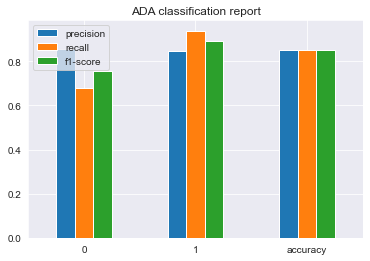

In [39]:
classification_report_ada = classification_report(y_test, y_pred_ada, output_dict=True)
df_ada_report = pd.DataFrame(classification_report_ada).transpose()

df_ada_report.iloc[:3, :3].plot(kind='bar', title='ADA classification report', rot=0)

df_ada_report

## GaussianNB

### Get best parameters

In [44]:
# parameters = {'var_smoothing' : np.logspace(0,-9, num=100)}
#
# gs_gnb = GridSearchCV(GaussianNB(), parameters, verbose=3, scoring='f1', n_jobs=-1)
#
# gs_gnb.fit(array_X_train, y_train)
#
# print(gs_gnb.best_params_)
#
# # Find best model score
# gs_gnb.score(array_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0008111308307896872}


0.9883720930232558

### Execute algorithm


In [99]:
gnb = GaussianNB(var_smoothing=0.0008111308307896872)

# Training model
gnb.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_gnb = gnb.predict(array_X_test)

# Training score
print(f"Score on training set: {gnb.score(array_X_train, y_train)}")
print(f"Score on test set: {gnb.score(array_X_test, y_test)}")

test_set_score_gnb = gnb.score(array_X_test, y_test) * 100

Score on training set: 0.985
Score on test set: 0.67


### Confusion Matrix

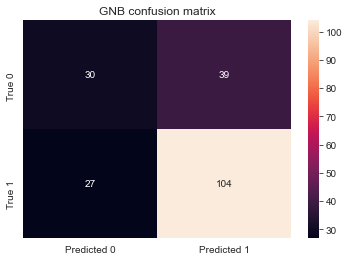

In [52]:
confunsion_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
df_confusion_matrix_gnb = pd.DataFrame(confunsion_matrix_gnb, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_gnb, annot=True, fmt='d')
plt.title("GNB confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics


,precision,recall,f1-score,support
0,0.526316,0.434783,0.476190,69.00
1,0.727273,0.793893,0.759124,131.00
accuracy,0.670000,0.670000,0.670000,0.67
macro avg,0.626794,0.614338,0.617657,200.00
weighted avg,0.657943,0.670000,0.661512,200.00


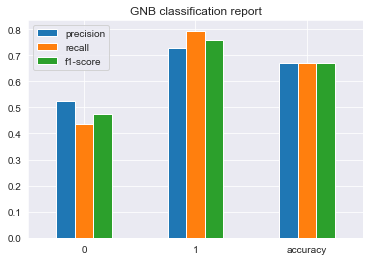

In [53]:
classification_report_gnb = classification_report(y_test, y_pred_gnb, output_dict=True)
df_gnb_report = pd.DataFrame(classification_report_gnb).transpose()

df_gnb_report.iloc[:3, :3].plot(kind='bar', title='GNB classification report', rot=0)

df_gnb_report

## DecisionTreeClassifier

### Get best parameters

In [49]:
parameters = {'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2', None]}

gs_dtc = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=3, scoring='f1', n_jobs=-1)

gs_dtc.fit(array_X_train, y_train)

print(gs_dtc.best_params_)

# Find best model score
gs_dtc.score(array_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_features': None, 'splitter': 'random'}


1.0

### Execute algorithm

In [100]:
dtc = DecisionTreeClassifier(splitter='random', max_features=None, random_state=42)

# Training model
dtc.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_dtc = gnb.predict(array_X_test)

# Training score
print(f"Score on training set: {dtc.score(array_X_train, y_train)}")
print(f"Score on test set: {dtc.score(array_X_test, y_test)}")

test_set_score_dtc = dtc.score(array_X_test, y_test) * 100

Score on training set: 1.0
Score on test set: 0.725


### Confusion Matrix

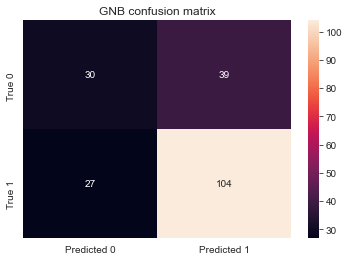

In [55]:
confunsion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
df_confusion_matrix_dtc = pd.DataFrame(confunsion_matrix_dtc, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_dtc, annot=True, fmt='d')
plt.title("GNB confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,0.526316,0.434783,0.476190,69.00
1,0.727273,0.793893,0.759124,131.00
accuracy,0.670000,0.670000,0.670000,0.67
macro avg,0.626794,0.614338,0.617657,200.00
weighted avg,0.657943,0.670000,0.661512,200.00


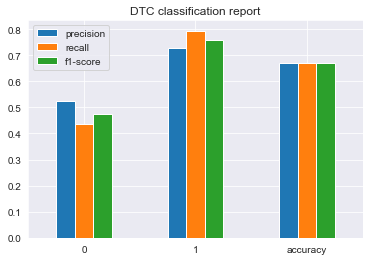

In [56]:
classification_report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)
df_dtc_report = pd.DataFrame(classification_report_dtc).transpose()

df_dtc_report.iloc[:3, :3].plot(kind='bar', title='DTC classification report', rot=0)

df_dtc_report

## LogisticRegression

### Get best parameters

In [62]:
parameters = {'C': [0.001, 0.01, 0.1, 1.0],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga', 'sag']}

gs_lr = GridSearchCV(LogisticRegression(multi_class='auto', random_state=42), parameters, verbose=3, scoring='f1', n_jobs=-1)

gs_lr.fit(array_X_train, y_train)

print(gs_lr.best_params_)

# Find best model score
gs_lr.score(array_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1.0, 'solver': 'newton-cg'}


0.9360936093609361

### Execute algorithm

In [101]:
lr = LogisticRegression(C=1.0, solver='newton-cg', multi_class='auto', random_state=42)

# Training model
lr.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_lr = lr.predict(array_X_test)

# Training score
print(f"Score on training set: {lr.score(array_X_train, y_train)}")
print(f"Score on test set: {lr.score(array_X_test, y_test)}")

test_set_score_lr = lr.score(array_X_test, y_test) * 100

Score on training set: 0.91125
Score on test set: 0.81


### Confusion Matrix

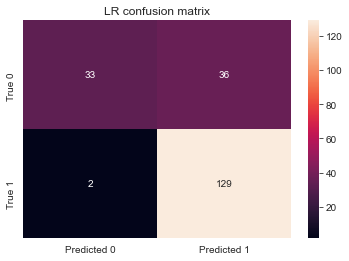

In [64]:
confunsion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
df_confusion_matrix_lr = pd.DataFrame(confunsion_matrix_lr, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_lr, annot=True, fmt='d')
plt.title("LR confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,0.942857,0.478261,0.634615,69.00
1,0.781818,0.984733,0.871622,131.00
accuracy,0.810000,0.810000,0.810000,0.81
macro avg,0.862338,0.731497,0.753119,200.00
weighted avg,0.837377,0.810000,0.789854,200.00


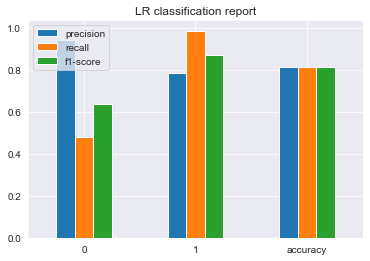

In [65]:
classification_report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
df_lr_report = pd.DataFrame(classification_report_lr).transpose()

df_lr_report.iloc[:3, :3].plot(kind='bar', title='LR classification report', rot=0)

df_lr_report

## KNeighborsClassifier

### Get best parameters

In [ ]:
parameters = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
              'algorithm': ['ball_tree']}

gs_knc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), parameters, verbose=3, scoring='f1', n_jobs=-1)

gs_knc.fit(array_X_train, y_train)

print(gs_knc.best_params_)

# Find best model score
gs_knc.score(array_X_train, y_train)

### Execute algorithm

In [ ]:
knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=31, weights='uniform', n_jobs=-1)

# Training model
knc.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_knc = knc.predict(array_X_test)

# Training score
print(f"Score on training set: {knc.score(array_X_train, y_train)}")
print(f"Score on test set: {knc.score(array_X_test, y_test)}")

test_set_score_knc = knc.score(array_X_test, y_test) * 100

### Confusion Matrix

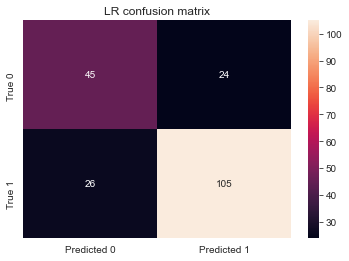

In [68]:
confunsion_matrix_knc = confusion_matrix(y_test, y_pred_knc)
df_confusion_matrix_knc = pd.DataFrame(confunsion_matrix_knc, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_knc, annot=True, fmt='d')
plt.title("LR confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,0.633803,0.652174,0.642857,69.00
1,0.813953,0.801527,0.807692,131.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.723878,0.726850,0.725275,200.00
weighted avg,0.751802,0.750000,0.750824,200.00


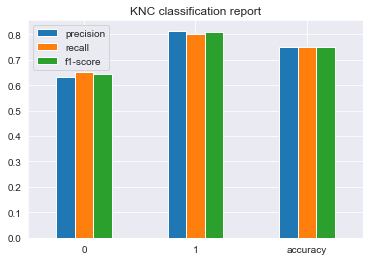

In [69]:
classification_report_knc = classification_report(y_test, y_pred_knc, output_dict=True)
df_knc_report = pd.DataFrame(classification_report_knc).transpose()

df_knc_report.iloc[:3, :3].plot(kind='bar', title='KNC classification report', rot=0)

df_knc_report

## Support Vector Machine

### Get best parameters

In [73]:
parameters = {'C': [0.001, 0.01, 0.1, 1.0],
              'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
              'gamma': ['auto', 'scale'],
              'decision_function_shape': ['ovo', 'ovr']}

gs_svc = GridSearchCV(SVC(), parameters, verbose=3, scoring='f1', n_jobs=-1)

gs_svc.fit(X_train_vectorizer, y_train)

print(gs_svc.best_params_)

# Find best model score
gs_svc.score(X_train_vectorizer, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


0.9886148007590132

### Execute algorithm

In [103]:
svc = SVC(C=1.0, kernel='linear', decision_function_shape='ovo', gamma='auto')

# Training model
svc.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_svc = svc.predict(array_X_test)

# Training score
print(f"Score on training set: {svc.score(array_X_train, y_train)}")
print(f"Score on test set: {svc.score(array_X_test, y_test)}")

test_set_score_svc = svc.score(array_X_test, y_test) * 100

Score on training set: 0.985
Score on test set: 0.87


### Confusion Matrix

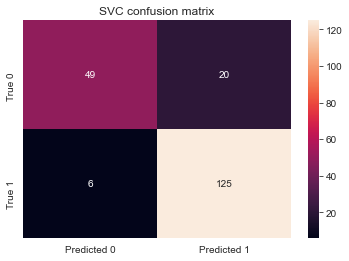

In [75]:
confunsion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
df_confusion_matrix_svc = pd.DataFrame(confunsion_matrix_svc, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_svc, annot=True, fmt='d')
plt.title("SVC confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,0.890909,0.710145,0.790323,69.00
1,0.862069,0.954198,0.905797,131.00
accuracy,0.870000,0.870000,0.870000,0.87
macro avg,0.876489,0.832172,0.848060,200.00
weighted avg,0.872019,0.870000,0.865958,200.00


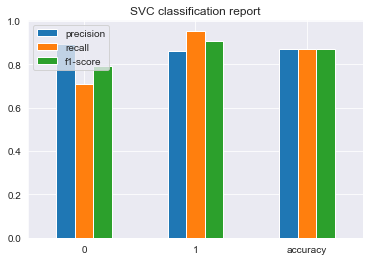

In [76]:
classification_report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
df_svc_report = pd.DataFrame(classification_report_svc).transpose()

df_svc_report.iloc[:3, :3].plot(kind='bar', title='SVC classification report', rot=0)

df_svc_report

## RandomForestClassifier

### Get best parameters

In [77]:
parameters = {'n_estimators': [10, 50, 100, 250, 500]}

gs_rfc = GridSearchCV(RandomForestClassifier(random_state=42), parameters, verbose=3, scoring='f1', n_jobs=-1)

gs_rfc.fit(array_X_train, y_train)

print(gs_rfc.best_params_)

# Find best model score
gs_rfc.score(array_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 100}


1.0

### Execute algorithm

In [104]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Training model
rfc.fit(array_X_train, y_train)

# Predicting the test set results
y_pred_rfc = rfc.predict(array_X_test)

# Training score
print(f"Score on training set: {rfc.score(array_X_train, y_train)}")
print(f"Score on test set: {rfc.score(array_X_test, y_test)}")

test_set_score_rfc = rfc.score(array_X_test, y_test) * 100

Score on training set: 1.0
Score on test set: 0.795


### Confusion Matrix

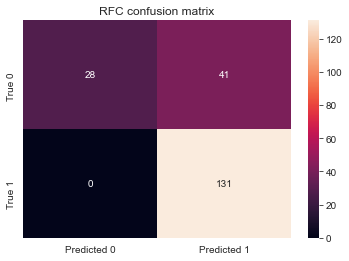

In [79]:
confunsion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
df_confusion_matrix_rfc = pd.DataFrame(confunsion_matrix_rfc, columns=['Predicted 0', 'Predicted 1'],
                                       index=['True 0', 'True 1'])
# display(df_confusion_matrix_gnb)

sns.heatmap(df_confusion_matrix_rfc, annot=True, fmt='d')
plt.title("RFC confusion matrix")
plt.figure(figsize=(24, 14), dpi=100)
plt.close()

### Performance metrics

,precision,recall,f1-score,support
0,1.000000,0.405797,0.577320,69.000
1,0.761628,1.000000,0.864686,131.000
accuracy,0.795000,0.795000,0.795000,0.795
macro avg,0.880814,0.702899,0.721003,200.000
weighted avg,0.843866,0.795000,0.765545,200.000


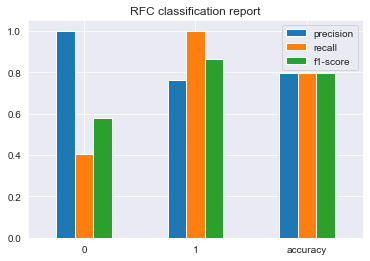

In [81]:
classification_report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
df_rfc_report = pd.DataFrame(classification_report_rfc).transpose()

df_rfc_report.iloc[:3, :3].plot(kind='bar', title='RFC classification report', rot=0)

df_rfc_report

## Plot algorithm accuracy

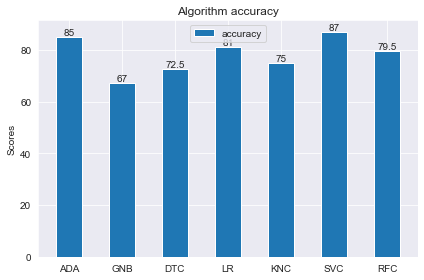

In [128]:
labels = ['ADA', 'GNB', 'DTC', 'LR', 'KNC', 'SVC', 'RFC']
score_values = [test_set_score_ada, test_set_score_gnb, test_set_score_dtc, test_set_score_lr, test_set_score_knc, test_set_score_svc, test_set_score_rfc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the space between bar
width_bar = 0.50

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score_values, width_bar, label='accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Algorithm accuracy')
ax.set_xticks(x - width/2, labels)
ax.legend()

ax.bar_label(rects1)

fig.tight_layout()

plt.show()